# Exploring the scikit-learn iris dataset, K-Nearest Neighbours

The Scikit documentation includes some great examples. Looking through the examples I found them difficult to interpret at first. 

These are my own notes on some variations of these examples, with some detailed comments added. Links to reference information are included throughout.

Ref: [Scikit documentation: The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Loading the dataset and an initial look at the data

In [212]:
# Set up Jupyter notebook to display plots inline
%matplotlib notebook

# Import Numpy and Matplotlib pyplot
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

In [213]:
X = iris.data      # The features (the sepal is part of the flower)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [214]:
# We have data on 150 iris flowers and 4 different features
X.shape

(150, 4)

In [215]:
# These are the types of irises
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [216]:
# y = 0, 1, or 2 depending on the type of iris
y = iris.target
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Create a scatter plot
Let's look at a scatter plot of the first 2 features (sepal length and sepal width).

<IPython.core.display.Javascript object>


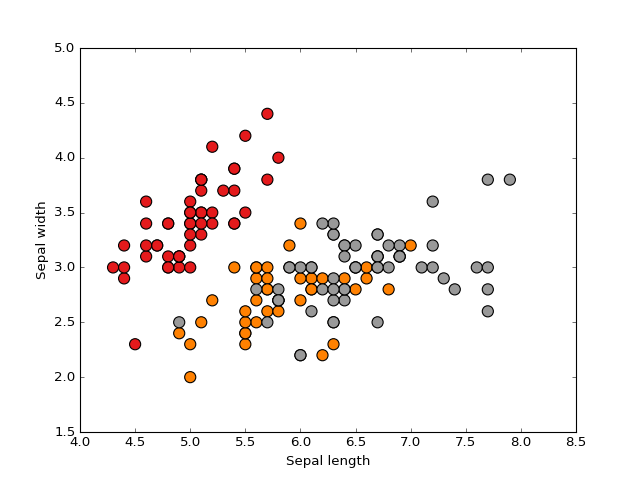

In [217]:
plt.figure()                 # Create the figure

plt.scatter(X[:, 0],         # Sepal length on x-axis
            X[:, 1],         # Sepal width on y-axis
            s=100,           # The size of each marker point on the graph
            c=y,             # use the type of iris to colour the dots
            cmap=plt.cm.Set1 # 'Set1' is a particular colourmap. 
           ) 

# Label the axes
# (the semicolon here is to suppress text output from this Jupyter cell as we only want the graph)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

## Plotting a scatter matrix using Pandas
We can use this to look at the relationships between pairs of features

https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot

<IPython.core.display.Javascript object>


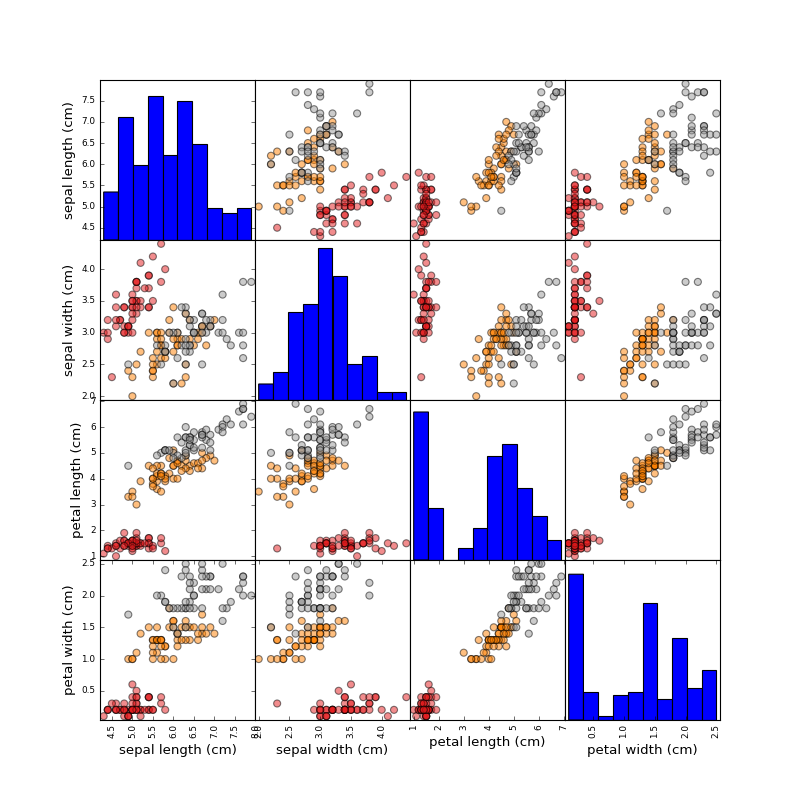

In [218]:
import pandas as pd
X_panda = pd.DataFrame(data=X, columns=iris.feature_names) # Convert to Pandas dataframe
y_panda = pd.DataFrame(y)                                  # Convert to Pandas dataframe

scatter = pd.scatter_matrix(X_panda, 
                            c=y_panda, 
                            marker = 'o', 
                            s=40, 
                            hist_kwds={'bins':10}, 
                            figsize=(10,10),
                            cmap=plt.cm.Set1
                           );

## A 3D plot of the first 3 features
Another way to examine the relationships

<IPython.core.display.Javascript object>


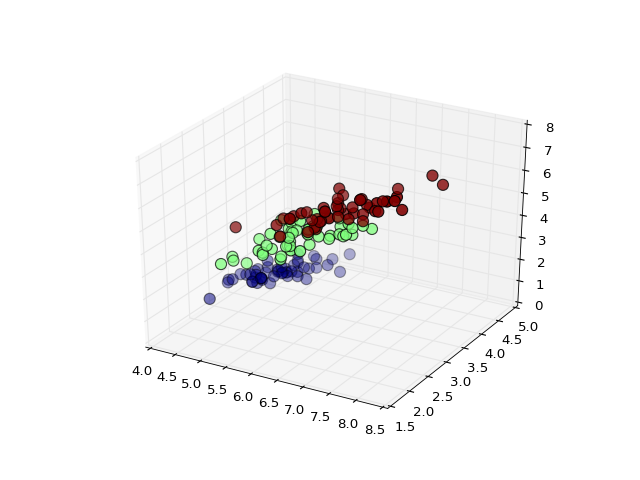

In [219]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plt.figure()

# The '111' here means create a 1 x 1 grid of subplots and choose the first one
# i.e. we want just one subplot
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0],
           X[:, 1],
           X[:, 2],
           c = y,
           marker = 'o',
           s=100)

plt.show()

https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

In [220]:
# Try collecting y=2 and y=1 together as they do not appear linearly separable.
# At the moment we have y = 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [221]:
# Reassign all the y=2 values to y=1
y[y==2] = 1
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<IPython.core.display.Javascript object>


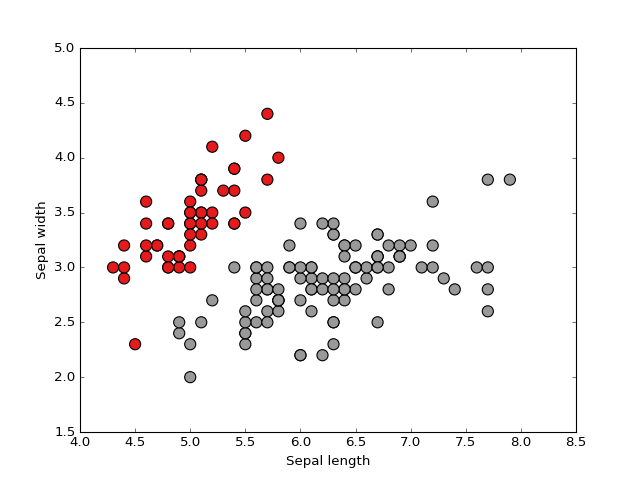

In [222]:
# Let's plot the data again to check that transformation worked as expected

plt.figure()                 # Create the figure

plt.scatter(X[:, 0],         # Sepal length on x-axis
            X[:, 1],         # Sepal width on y-axis
            s=100,           # The size of each marker point on the graph
            c=y,             # use the type of iris to colour the dots
            cmap=plt.cm.Set1 # 'Set1' is a particular colourmap. 
           ) 

# Label the axes
# (the semicolon here is to suppress text output from this Jupyter cell as we only want the graph)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html

https://matplotlib.org/examples/color/colormaps_reference.html

## Splitting data into training and test sets

In [223]:
# We could drop the 3rd and 4th features to simplify the data
X = X[:, :2]

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## k-Nearest Neighbors Classification

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train);

In [225]:
# The fit is good:
knn.score(X_test, y_test)

1.0

## Plotting the decision boundary

In [226]:
# First find the min and max values of each feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
print(x_min, x_max)

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print(y_min, y_max)

3.3 8.9
1.0 5.4


In [227]:
# Create a mesh grid
h=(x_max-x_min)/500

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(xx)
print(yy)

[[ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]
 [ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]
 [ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]
 ..., 
 [ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]
 [ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]
 [ 3.3     3.3112  3.3224 ...,  8.8664  8.8776  8.8888]]
[[ 1.      1.      1.     ...,  1.      1.      1.    ]
 [ 1.0112  1.0112  1.0112 ...,  1.0112  1.0112  1.0112]
 [ 1.0224  1.0224  1.0224 ...,  1.0224  1.0224  1.0224]
 ..., 
 [ 5.368   5.368   5.368  ...,  5.368   5.368   5.368 ]
 [ 5.3792  5.3792  5.3792 ...,  5.3792  5.3792  5.3792]
 [ 5.3904  5.3904  5.3904 ...,  5.3904  5.3904  5.3904]]


In [228]:
# This is how it looks as a flattened array
xx.ravel() 

array([ 3.3   ,  3.3112,  3.3224, ...,  8.8664,  8.8776,  8.8888])

In [229]:
# And how it looks as the xx and yy values rearranged into an array as column values:
# We do this as this is the form of input needed for knn.predict()
xx_yy_grid = np.c_[xx.ravel(), yy.ravel()] 
print(xx_yy_grid)

[[ 3.3     1.    ]
 [ 3.3112  1.    ]
 [ 3.3224  1.    ]
 ..., 
 [ 8.8664  5.3904]
 [ 8.8776  5.3904]
 [ 8.8888  5.3904]]


https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html

In [230]:
# Predict the model outcome for each of those grid values
Z = knn.predict(xx_yy_grid)

# Reshape the output into a suitable form for plotting
print(xx.shape)
print(Z.shape)
Z = Z.reshape(xx.shape)
Z

(393, 500)
(196500,)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

<IPython.core.display.Javascript object>


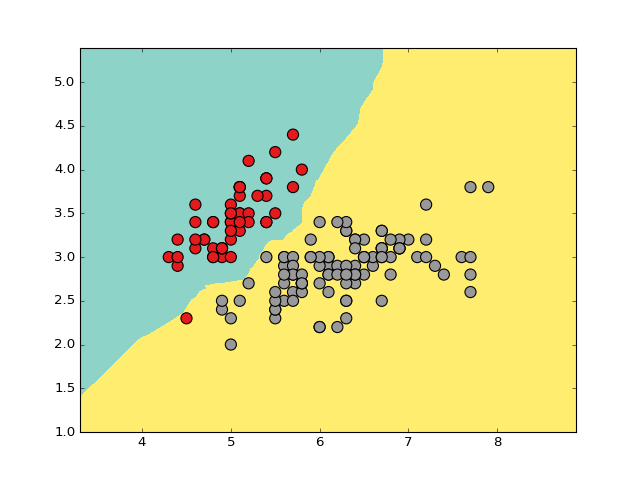

In [231]:
# Plot the decision boundard
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html